# Data Wrangling

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
kashti = sns.load_dataset("titanic")
ks1 = kashti.copy()
ks2 = kashti.copy()

In [5]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dealing with missing values
- In a data set missing values are either ? or N/A or NaN, or 0 or a blank cell

> **Steps**

1. Try to collect data again
2. remove rows whose cells contain missing values
3. If a column contain too much missing values, we could also remove that column
4. Based on usecase, we could even retain missing values
5. Fill missing values with mean of that column
6. Fill missing values based on specific function (e.g; person who understands data more or who collect data, can fill more appropriate values that others)
7. Use ML algorithms to fill missing values

In [6]:
# check missing values
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# shape of the dataset
ks1.shape

(891, 15)

In [8]:
# remove all rows where deck is missing
kashti.dropna(subset=["deck"], axis=0, inplace=True) # inplace=True modifies the original DataFrame

# shape of the dataset after removing missing values
kashti.shape

(203, 15)

In [9]:
# check missing values again
kashti.isnull().sum()

survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [10]:
# drop all rows where any value in cell is missing
kashti = kashti.dropna(axis=0, how="any")  # how="any" drops rows with any missing values

# shape of the dataset after dropping rows with any missing values
kashti.shape

(182, 15)

In [11]:
# check missing values if there is any in the dataset
kashti.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town    False
alive          False
alone          False
dtype: bool

> ##### After dropping all the missing values, only 182 rows are left from 892.

In [12]:
# Replace missing values of age with the average of that column
mean = ks1['age'].mean()

# fillna replaces NaN values with the specified value
ks1['age'] = ks1['age'].fillna(mean)
# ks1['age'] = ks1['age'].replace(np.nan, mean) # same result as above

In [13]:
# check missing values if there is any in the dataset
kashti.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## Data Formating
- Data should be consistent in all rows of a column.
- If a column represent weight of an object, then all data should be in _kg_ or _g_ and not mixture of both.
- If a column represent city, then either use short form for all data or complete city name. e.g; short forms are: Faisalabad (FSD), SadikAbad (SDK) etc.

In [14]:
kashti.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [15]:
# # change data type of age to integer
# ks1['age'] = ks1['age'].astype(int)

In [16]:
ks1.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [17]:
# convert ages data from year to days
ks1['age'] = ks1['age'] * 365

In [18]:
# change name of age column
ks1.rename(columns={'age': 'age_in_days'}, inplace=True)
ks1.head()

,survived,pclass,sex,age_in_days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,8030.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,13870.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,9490.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,12775.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,12775.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Normalization
_Data which form bell curve in histogram is normal data_

- Uniform the data
- Making sure they have same impact 

In [19]:
# select age and fare from kashti dataset
ks3 = ks1[['age_in_days', 'fare']].copy()
ks4 = ks1[['age_in_days', 'fare']].copy()
ks3.head()

,age_in_days,fare
0,8030.0,7.2500
1,13870.0,71.2833
2,9490.0,7.9250
3,12775.0,53.1000
4,12775.0,8.0500


- Above data is really in wide range and we need to normalize and hard to compare
    - It means that, values of age and fare are far away from each other
- Normalization change the values to the range of 0-to-1 (now both variables has similar influence on our models)

### Method of Normalization
1. Simple feature scaling
    - x(new) = x(old) / x(max)
2. Min-Max method
3. Z-score (standard score) -3 -to- +3
4. Log transformation


In [20]:
# Simple feature scaling method --> output ranges from 0 to 1

ks3.loc[:, 'fare'] = ks3['fare'] / ks3['fare'].max()

# Change data type of age to float
ks3.loc[:, 'age_in_days'] = ks3['age_in_days'] / ks3['age_in_days'].max()
ks3.head()

,age_in_days,fare
0,0.2750,0.014151
1,0.4750,0.139136
2,0.3250,0.015469
3,0.4375,0.103644
4,0.4375,0.015713


In [21]:
# Min - Max Method --> output ranges from 0 to 1
ks4.loc[: , 'fare'] = (ks4['fare'] - ks4['fare'].min()) / (ks4['fare'].max() - ks4['fare'].min())

ks4.loc[: , 'age_in_days'] = (ks4['age_in_days'] - ks4['age_in_days'].min()) / (ks4['age_in_days'].max() - ks4['age_in_days'].min())

ks4.head()

,age_in_days,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [22]:
# Z-score (standard score) --> output ranges from -3 to +3
ks5 = ks1[['age_in_days', 'fare']].copy()

ks5.loc[:, 'fare'] = (ks5['fare'] - ks5['fare'].mean()) / ks5['fare'].std()

ks5.loc[: , 'age_in_days'] = (ks5['age_in_days'] - ks5['age_in_days'].mean()) / ks5['age_in_days'].std()

ks5.head()

,age_in_days,fare
0,-0.592148,-0.502163
1,0.638430,0.786404
2,-0.284503,-0.488580
3,0.407697,0.420494
4,0.407697,-0.486064


In [23]:
# log transformation method
ks6 = ks1[['age_in_days', 'fare']].copy()
ks6.loc[:, 'fare'] = np.log(ks6['fare'] + 1)  # Adding 1 to avoid log(0)
ks6.loc[:, 'age_in_days'] = np.log(ks6['age_in_days'] + 1)  # Adding 1 to avoid log(0)

ks6.head()

,age_in_days,fare
0,8.991064,2.110213
1,9.537556,4.280593
2,9.158099,2.188856
3,9.455324,3.990834
4,9.455324,2.202765


## Binning

- Grouping of values into smaller number of values (bins)
- Convert numeric into categories (kid, young, elder) or 1-16, 17-40, >40
- To have better understanding of groups
  - low vs mid vs high price

`Binning creates a Ordinal category. Means, it contains some order i.e; kid < young < elder`

In [24]:
# Create bins of age from 0-16, 16-40, >40
bins = [0, 16, 40, np.inf]  # Define the bins - np.inf means infinity(till last value)
labels = ['kid', 'young', 'elder']  # Define the labels for the bins

kashti['age_group'] = pd.cut(kashti['age'], bins=bins, labels=labels, right=False)  # right=False means the right edge is not included - in it 16 is young, 40 is elder.
# kashti['age_group'] = pd.cut(kashti['age'], bins=bins, labels=labels, include_lowest=True)  # include_lowest=True includes the lowest edge in the first bin - in it 16 is kid, 40 is young, elder is >40.

kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,young
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,young
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,elder
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,kid
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,elder


## Converting categories into dummies

- Ease to use for computaion
- e.g convert Male, Female to (0, 1)

In [25]:
# # Convert sex column into dummies
sex_dummies =  pd.get_dummies(kashti['sex'], drop_first=True, prefix='is') # drop_first =True drops the first category to avoid multicollinearity in regression models. If you want to keep all categories, set drop_first=False.

# # add new dummy columns to the original DataFrame
kashti = pd.concat([kashti, sex_dummies], axis=1)

# convert values of sex column from female and male to 0 and 1
kashti['sex_dummies1'] = kashti['sex'].map({'female': 0, 'male': 1})
kashti.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,is_male,sex_dummies1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,young,False,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,young,False,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,elder,True,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,kid,False,0
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,elder,False,0


### Binning using Datacamp way

#### Create new categories based on age

       sex   age       age_category
1   female  38.0              adult
3   female  35.0              adult
6     male  54.0  middle_aged_adult
10  female   4.0              child
11  female  58.0  middle_aged_adult
21    male  34.0              adult
23    male  28.0              adult
27    male  19.0              adult
52  female  49.0  middle_aged_adult
54    male  65.0     senior_citizen


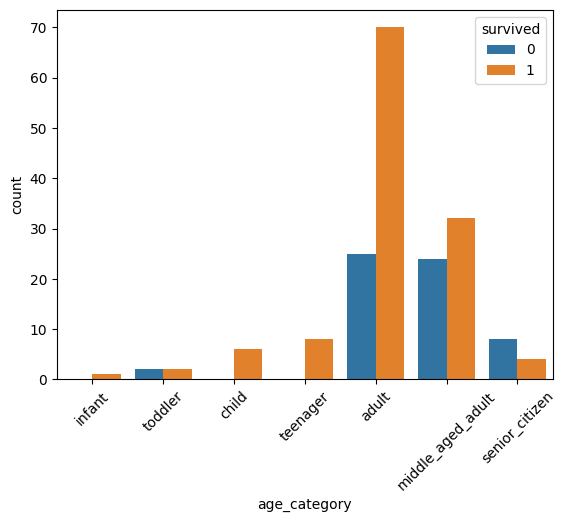

In [26]:
# Create bins of age from 0-1, 1-3, 3-13, 13-18, 18-40, 40-60, >60
bins = [0, 1, 3, 13, 18, 40, 60, np.inf]  # Define the bins - np.inf means infinity(till last value)
age_categories = ["infant", "toddler", "child", "teenager", "adult", "middle_aged_adult", "senior_citizen"]

kashti['age_category'] = pd.cut(kashti['age'], bins=bins, labels=age_categories, right=False) 

print(kashti[['sex','age', 'age_category']].head(10))

# Plot the counts of each category
sns.countplot(data=kashti, x="age_category", hue='survived')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Filter the DataFrame for object columns
categorical_df = kashti.select_dtypes(["object", "category"])

# Loop through columns
for column in categorical_df.columns:
  print(f"Number of unique values in '{column}' column: ", categorical_df[column].nunique()) # Print the number of unique values

Number of unique values in 'sex' column:  2
Number of unique values in 'embarked' column:  3
Number of unique values in 'class' column:  3
Number of unique values in 'who' column:  3
Number of unique values in 'deck' column:  7
Number of unique values in 'embark_town' column:  3
Number of unique values in 'alive' column:  2
Number of unique values in 'age_group' column:  3
Number of unique values in 'age_category' column:  7


In [28]:
# print(kashti['age_category'].unique())
print(kashti[['sex', 'age_category']].value_counts())

sex     age_category     
female  adult                52
male    adult                43
        middle_aged_adult    33
female  middle_aged_adult    23
male    senior_citizen       10
female  teenager              7
male    child                 4
female  child                 2
        toddler               2
        senior_citizen        2
male    toddler               2
        infant                1
        teenager              1
Name: count, dtype: int64


#### Converting categories of age_group column from 7 to 3

- Converting larger categories into smaller one could give us better visualization.

`Unique categories in a dataset could also be 50. Then it will be helpful`

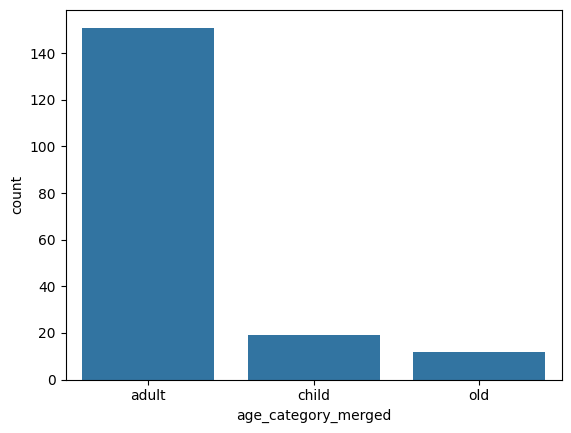

In [29]:
child_category = "infant|toddler|child|teenager"
adult_category = "adult|middle_aged_adult"
old_category = "senior_citizen"

updated_age_categories = ['child', 'adult', 'old']

# Create conditions for values in updated_age_categories to be created
conditions = [
    (kashti["age_category"].str.contains(child_category)),
    (kashti["age_category"].str.contains(adult_category)),
    (kashti["age_category"].str.contains(old_category))
]

# Apply the conditions list to the updated_age_categories
kashti["age_category_merged"] = np.select(conditions, # condition list
                                        updated_age_categories, # choice list
                                        default="Other" # if a value do not match with any of the categories in conditions, then "Other" will be its category
                                        )

# Plot the counts of each category
sns.countplot(data=kashti, x="age_category_merged")
plt.show()

#### Simple Alternate way to above

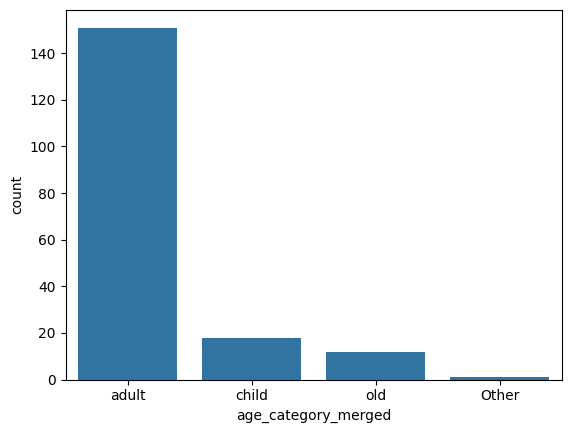

In [30]:
mapping = {
    # "infant": "child",
    "toddler": "child",
    "child": "child",
    "teenager": "child",
    "adult": "adult",
    "middle_aged_adult": "adult",
    "senior_citizen": "old"
}

kashti["age_category_merged"] = kashti["age_category"].map(mapping).fillna("Other") # fillna("Other") -- infant category will be "Other". Because its not mentioned in mapping.

sns.countplot(data=kashti, x="age_category_merged")
plt.show()

In [31]:
# Print the relative frequency of age_category
print(kashti['age_category'].value_counts(normalize=True))

age_category
adult                0.521978
middle_aged_adult    0.307692
senior_citizen       0.065934
teenager             0.043956
child                0.032967
toddler              0.021978
infant               0.005495
Name: proportion, dtype: float64


`we have 52% of adult, 30% of middle_aged_adult etc...`

### Cross tabulation

- Cross-tabulation can help identify how observations occur in combination.

`Cross tabulation can also be achieved using groupby or pivit_table`

In [32]:
print(pd.crosstab(kashti["age_category"], kashti["survived"])) # groupby age_category and survived, and then count values
# print('--------------------------------------')
# print(pd.crosstab(kashti["age_category"], kashti["survived"], values=kashti["survived"], aggfunc='count')) # same result as above

survived            0   1
age_category             
infant              0   1
toddler             2   2
child               0   6
teenager            0   8
adult              25  70
middle_aged_adult  24  32
senior_citizen      8   4


In [33]:
# Show all columns without wrapping
pd.set_option("display.width", 1000)

print(pd.crosstab(kashti["sex"], kashti["age_category"], values=kashti['fare'], aggfunc='mean')) # get average fare by sex and age_category

age_category  infant   toddler      child    teenager      adult  middle_aged_adult  senior_citizen
sex                                                                                                
female           NaN  81.00625  27.850000   97.302386  91.613540          87.658157        76.60415
male          151.55  32.50000  60.083325  110.883300  83.447677          52.016415        65.87542


---

## Clean/Strip values of a column

In [34]:
ride_sharing = pd.read_csv("../00_datasets/ride_sharing_new.csv")
print(ride_sharing[['duration', 'station_A_id', 'station_B_id', 'bike_id', 'user_type', 'user_birth_year']].head())
print("duration dtype: ", ride_sharing['duration'].dtype)
print('info: ', ride_sharing.info())

print('-------------------------------------------------------')
# change type of duration to int
ride_sharing['duration_change'] = ride_sharing['duration'].str.strip('minutes') # strip minutes from complete series
ride_sharing['duration_int'] = ride_sharing['duration_change'].astype(int)
print(ride_sharing[['duration', 'duration_change', 'duration_int']], end='\n\n')
print("AVERAGE: ", ride_sharing['duration_int'].mean())

     duration  station_A_id  station_B_id  bike_id  user_type  user_birth_year
0  12 minutes            81           323     5480          2             1959
1  24 minutes             3           118     5193          2             1965
2   8 minutes            67            23     3652          3             1993
3   4 minutes            16            28     1883          1             1979
4  11 minutes            22           350     4626          2             1994
duration dtype:  object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25763 entries, 0 to 25762
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          25763 non-null  int64 
 1   duration         25763 non-null  object
 2   station_A_id     25763 non-null  int64 
 3   station_A_name   25763 non-null  object
 4   station_B_id     25763 non-null  int64 
 5   station_B_name   25763 non-null  object
 6   bike_id          25763 non-n

## Replace or remove out-of-range/unexpected values

In below example, we are replacing user age < 18. Because, its illegal to ride before 18. Its a wrong data.

`Unexpected values could be replaced or removed based on usecase`

In [35]:
import datetime as dt

current_year = dt.datetime.now().year # Get current year
ride_sharing['user_age'] = current_year - ride_sharing['user_birth_year'] # Calculate age

print(ride_sharing[['user_birth_year', 'user_age']][ride_sharing['user_age'] < 18]) # print user age less than 18. - Age cannot be negative

# Update unknown user_birth_year with average
ride_sharing.loc[ride_sharing['user_age'] < 18, 'user_birth_year'] = int(ride_sharing['user_birth_year'].mean())
ride_sharing['user_age'] = current_year - ride_sharing['user_birth_year'] # Recalculate user_age

print("Count users under 18 remain: ", (ride_sharing['user_age'] < 18).sum())

   user_birth_year  user_age
6             2040       -15
Count users under 18 remain:  0


## Check duplicated rows

In [36]:
# Find duplicates based on ride_id
duplicates = ride_sharing.duplicated(['ride_id'], # check which rideIds are duplicated
                                     keep=False # keep all duplicated rows - 'first' argument for keeping 1st row of duplicated rows and 'last' for last row
                                     )
print("Duplicated ride_id: ", duplicates.sum()) # no. of duplicated rows

all_values_duplicated = ride_sharing.duplicated(keep=False) # keep all duplicated rows - 
print("all_values_duplicated: ", all_values_duplicated.sum())

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration_int','user_birth_year']])

Duplicated ride_id:  6
all_values_duplicated:  2
       ride_id  duration_int  user_birth_year
23644    23644             3             1982
25760    23644             3             1980
25743    25743            10             1996
25762    25743            12             1996
25752    25752            15             1994
25761    25752            15             1994


`ride_id: 23644 and 25752 are incomplete duplicates because user_birth_year and duration is different respectively`

`ride_id: 25752 is complete duplicate because all column values are same`


In [37]:
print(ride_sharing.tail())

       ride_id    duration  station_A_id                                     station_A_name  station_B_id                                 station_B_name  bike_id  user_type  user_birth_year user_gender duration_change  duration_int  user_age
25758    25758  14 minutes            15  San Francisco Ferry Building (Harry Bridges Pl...            42  San Francisco City Hall (Polk St at Grove St)     4438          2             1995        Male             14             14        30
25759    25759  29 minutes            16                            Steuart St at Market St           115                             Jackson Playground     1705          3             1990        Male             29             29        35
25760    23644   3 minutes            22                              Howard St at Beale St           343                            Bryant St at 2nd St     5391          2             1980        Male              3              3        45
25761    25752  15 minutes      

## Cleaning duplicated rows

In [39]:
# Drop complete duplicates from ride_sharing - means: only one value will remain from complete duplicated values
ride_dup = ride_sharing.drop_duplicates() # 
print("No. of complete duplicates: ", ride_dup.duplicated().sum()) # no. of complete duplicates

remaining_duplicates = ride_dup.duplicated(['ride_id'],  # duplicated ride_id values
                                                            keep=False # keep all duplicated rows
                                                            )
print("No. of complete duplicates: ", remaining_duplicates.sum()) # no. of incomplete duplicates
ride_dup_filtered_cols = ride_dup[['ride_id','duration_int','user_birth_year']]
print(ride_dup_filtered_cols[remaining_duplicates])

# Drop incomplete duplicates - be replacing user_birth_year with "minimum user_birth_year" and duration_int with "mean".
statistics = {'user_birth_year': 'min', 'duration_int': 'mean'} # Create statistics dictionary for aggregation function
ride_unique = ride_dup.groupby('ride_id').aggregate(statistics).reset_index() # Group by ride_id and compute new statistics

# ### Same result as above
# ride_dup['user_birth_year'] = ride_dup.groupby('ride_id')['user_birth_year'].agg('min')
# ride_dup['duration_int'] = ride_dup.groupby('ride_id')['duration_int'].agg('mean')
# ride_unique = ride_dup.drop_duplicates(subset='ride_id').reset_index(drop=True)

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = ['ride_id'], keep = False)
duplicated_rides = ride_unique[duplicates == True]
print("duplicated rides shape:", duplicated_rides.shape)

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

No. of complete duplicates:  0
No. of complete duplicates:  4
       ride_id  duration_int  user_birth_year
23644    23644             3             1982
25743    25743            10             1996
25760    23644             3             1980
25762    25743            12             1996
duplicated rides shape: (0, 3)
